<a href="https://colab.research.google.com/github/00kang/gis_deep_learning/blob/main/July/07_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **선형 회귀**

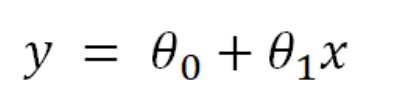

theta_0 = 편향, 직선의 절편 <br>
theta_1 = 가중치, 직선의 기울기

**클래스 정의**

In [1]:
class Y_pred():
    def __init__(self, theta_0, theta_1):
        self.theta_0 = theta_0
        self.theta_1 = theta_1

**외부함수 정의**

In [2]:
def out_y_hat(self, input_x):
    y_hat_row = []
    for i in range(len(input_x)):
        y_hat = self.theta_0 + self.theta_1*input_x[i]
        y_hat_row.append(y_hat)
    
    return y_hat_row

Y_pred.y_hat = out_y_hat #외부 함수를 클래스함수로 정의

**예시1**

In [3]:
Y_pred_C = Y_pred(theta_0 = 1, theta_1 = 2)

x=[1000]
Y_pred_C.y_hat(x)

[2001]

**예시2**

In [4]:
Y_pred_C = Y_pred(theta_0 = 1, theta_1 = 2)

x=[580, 700, 810, 840] #학습데이터
Y_pred_C.y_hat(x)

[1161, 1401, 1621, 1681]

**실제값과 예측값의 차이 발생 => 차이를 최소화 해야함 => 최적화**

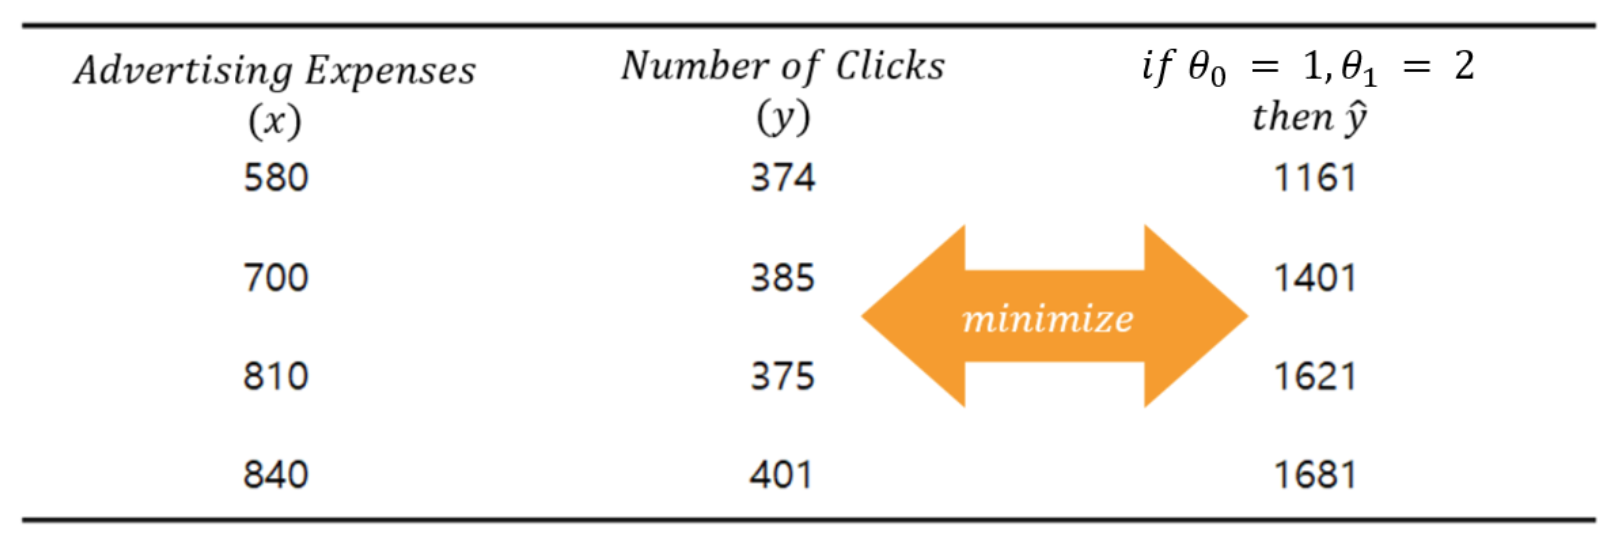

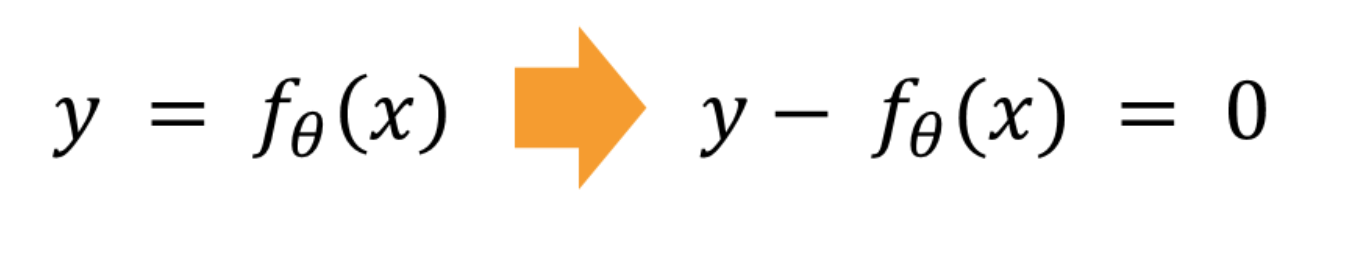

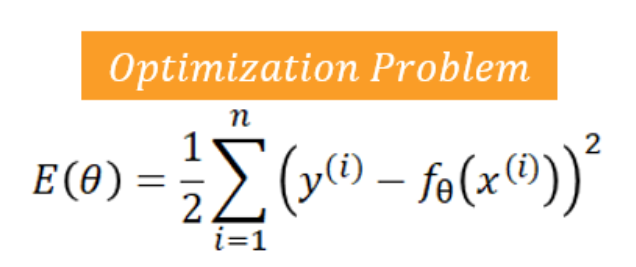

# **최적화**

* **목적함수** = 정략적 지표를 높일 것인지, 낮출 것인지에 대하여 목적을 가지고 있는 함수 <br>
* **손실함수** = 신경망의 성능을 측정하고자 출력한 정략적 지표


In [5]:
import numpy as np

y_label_total = [374, 385, 375, 401]
y_hat_total   = [1161, 1401, 1621, 1681]

diff_row = []
for i in range(len(y_label_total)):
    diff = y_label_total[i] - y_hat_total[i]
    diff_row.append(diff)
    square = np.square(diff_row)
    sse = 1/2*(np.sum(square))

print("Diff : {} \nSquare : {}\nSSE : {}".format(diff_row, square, sse))

Diff : [-787, -1016, -1246, -1280] 
Square : [ 619369 1032256 1552516 1638400]
SSE : 2421270.5


# **경사하강법**

**경사하강법**     
: 목적함수를 풀기 위한 것    
: 최종적으로 최소 함수 값을 갖도록 하는 독립 변수 값을 찾는 방법

* 에타/learning_rate/lr/학습률 : 값이 갱신되는 보폭을 제어하는 역할    
* 에폭/epochs : 반복 갱신 횟수


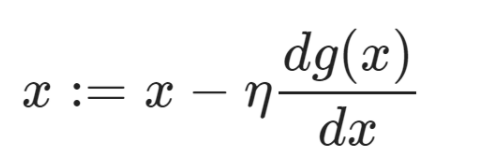

**경사하강법 적용 예시 식** 

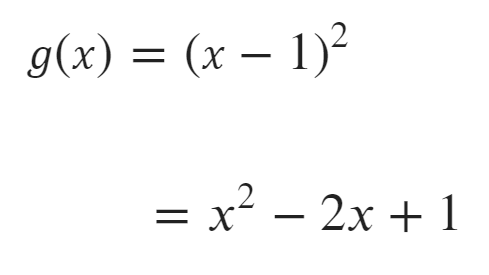

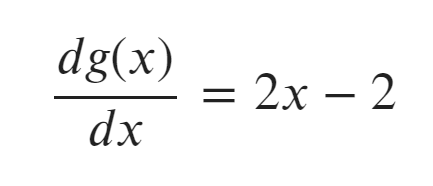

### **경사하강법 적용1**     

**학습률 = 1, x = 3,  epoch = 4**

In [6]:
def g(x, learning_rate):
    print("Now X value : {}".format(x))
    epoch_1_x = x - learning_rate * ((2*x)-2)
    print("Epoch 1_x : {}".format(epoch_1_x))

    epoch_2_x = epoch_1_x - learning_rate * ((2*epoch_1_x)-2)
    print("Epoch 2_x : {}".format(epoch_2_x))

    epoch_3_x = epoch_2_x - learning_rate * ((2*epoch_2_x)-2)
    print("Epoch 3_x : {}".format(epoch_3_x))

    epoch_4_x = epoch_3_x - learning_rate * ((2*epoch_3_x)-2)
    print("Epoch 4_x : {}".format(epoch_4_x))

In [7]:
g(x = 3, learning_rate=1)

Now X value : 3
Epoch 1_x : -1
Epoch 2_x : 3
Epoch 3_x : -1
Epoch 4_x : 3


**학습률 = 0.1, x = 3,  epoch = 4** 

In [8]:
g(x = 3, learning_rate = 0.1)

Now X value : 3
Epoch 1_x : 2.6
Epoch 2_x : 2.2800000000000002
Epoch 3_x : 2.024
Epoch 4_x : 1.8192


**학습률 = 0.01, x = 3,  epoch = 4** 

In [9]:
g(x = 3, learning_rate = 0.01)

Now X value : 3
Epoch 1_x : 2.96
Epoch 2_x : 2.9208
Epoch 3_x : 2.882384
Epoch 4_x : 2.84473632


**학습률 = 0.01, x = 3,  epoch = 4** 

In [10]:
g(x = 3, learning_rate = 0.001)

Now X value : 3
Epoch 1_x : 2.996
Epoch 2_x : 2.992008
Epoch 3_x : 2.988023984
Epoch 4_x : 2.984047936032


### **경사하강법 적용2**

In [11]:
import numpy as np

def g(learning_rate, epoch_count, random_value_bool = False, x = 3):
    if random_value_bool: #random_value_bool == True
        x = np.random.normal(0,1,size = 1)

    print("Now x vlaue : {}".format(x))
    print("Learning Rate : {}".format(learning_rate))

    x_row = []
    for i in  range(epoch_count):
        x = x - learning_rate * ((2*x) - 2)
        print("Epoch : {} / x : {}".format(i+1,np.round(x,3)))
        x_row.append(x)
    
    return x_row

**x = random, learning_rate = 0.1, epoch = 20** 

In [18]:
result = g(learning_rate = 0.1 , epoch_count = 20, random_value_bool = True)

Now x vlaue : [0.68274691]
Learning Rate : 0.1
Epoch : 1 / x : [0.746]
Epoch : 2 / x : [0.797]
Epoch : 3 / x : [0.838]
Epoch : 4 / x : [0.87]
Epoch : 5 / x : [0.896]
Epoch : 6 / x : [0.917]
Epoch : 7 / x : [0.933]
Epoch : 8 / x : [0.947]
Epoch : 9 / x : [0.957]
Epoch : 10 / x : [0.966]
Epoch : 11 / x : [0.973]
Epoch : 12 / x : [0.978]
Epoch : 13 / x : [0.983]
Epoch : 14 / x : [0.986]
Epoch : 15 / x : [0.989]
Epoch : 16 / x : [0.991]
Epoch : 17 / x : [0.993]
Epoch : 18 / x : [0.994]
Epoch : 19 / x : [0.995]
Epoch : 20 / x : [0.996]


**시각화**

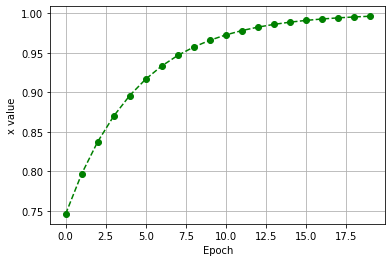

In [19]:
import matplotlib.pyplot as plt

plt.plot(result, "--o", color="green")
plt.xlabel('Epoch')
plt.ylabel("x value")
plt.grid()
plt.show()

**x = 3, learning_rate = 0.1, epoch = 20**

In [21]:
result = g(learning_rate = 0.1 , epoch_count = 20, random_value_bool = False, x=3)

Now x vlaue : 3
Learning Rate : 0.1
Epoch : 1 / x : 2.6
Epoch : 2 / x : 2.28
Epoch : 3 / x : 2.024
Epoch : 4 / x : 1.819
Epoch : 5 / x : 1.655
Epoch : 6 / x : 1.524
Epoch : 7 / x : 1.419
Epoch : 8 / x : 1.336
Epoch : 9 / x : 1.268
Epoch : 10 / x : 1.215
Epoch : 11 / x : 1.172
Epoch : 12 / x : 1.137
Epoch : 13 / x : 1.11
Epoch : 14 / x : 1.088
Epoch : 15 / x : 1.07
Epoch : 16 / x : 1.056
Epoch : 17 / x : 1.045
Epoch : 18 / x : 1.036
Epoch : 19 / x : 1.029
Epoch : 20 / x : 1.023


**시각화** 

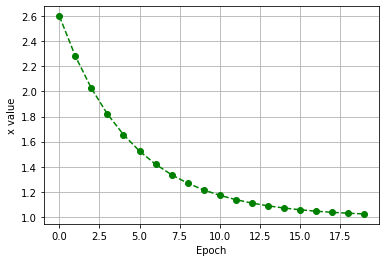

In [22]:
import matplotlib.pyplot as plt

plt.plot(result, "--o", color="green")
plt.xlabel('Epoch')
plt.ylabel("x value")
plt.grid()
plt.show()

**x = 3, learning_rate = 0.001, epoch = 20 => 갱신이 너무 느림** 

In [24]:
result = g(learning_rate = 0.001 , epoch_count = 20, random_value_bool = False, x=3)

Now x vlaue : 3
Learning Rate : 0.001
Epoch : 1 / x : 2.996
Epoch : 2 / x : 2.992
Epoch : 3 / x : 2.988
Epoch : 4 / x : 2.984
Epoch : 5 / x : 2.98
Epoch : 6 / x : 2.976
Epoch : 7 / x : 2.972
Epoch : 8 / x : 2.968
Epoch : 9 / x : 2.964
Epoch : 10 / x : 2.96
Epoch : 11 / x : 2.956
Epoch : 12 / x : 2.953
Epoch : 13 / x : 2.949
Epoch : 14 / x : 2.945
Epoch : 15 / x : 2.941
Epoch : 16 / x : 2.937
Epoch : 17 / x : 2.933
Epoch : 18 / x : 2.929
Epoch : 19 / x : 2.925
Epoch : 20 / x : 2.922


**시각화**

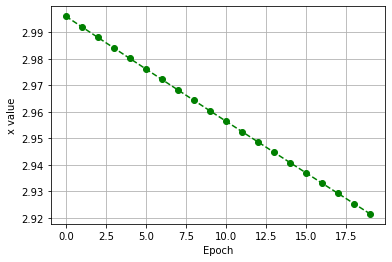

In [25]:
import matplotlib.pyplot as plt

plt.plot(result, "--o", color="green")
plt.xlabel('Epoch')
plt.ylabel("x value")
plt.grid()
plt.show()

**x = 3, learning_rate = 3, epoch = 20 => 발산**

In [26]:
result = g(learning_rate = 3 , epoch_count = 20, random_value_bool = False, x=3)

Now x vlaue : 3
Learning Rate : 3
Epoch : 1 / x : -9
Epoch : 2 / x : 51
Epoch : 3 / x : -249
Epoch : 4 / x : 1251
Epoch : 5 / x : -6249
Epoch : 6 / x : 31251
Epoch : 7 / x : -156249
Epoch : 8 / x : 781251
Epoch : 9 / x : -3906249
Epoch : 10 / x : 19531251
Epoch : 11 / x : -97656249
Epoch : 12 / x : 488281251
Epoch : 13 / x : -2441406249
Epoch : 14 / x : 12207031251
Epoch : 15 / x : -61035156249
Epoch : 16 / x : 305175781251
Epoch : 17 / x : -1525878906249
Epoch : 18 / x : 7629394531251
Epoch : 19 / x : -38146972656249
Epoch : 20 / x : 190734863281251


**시각화**

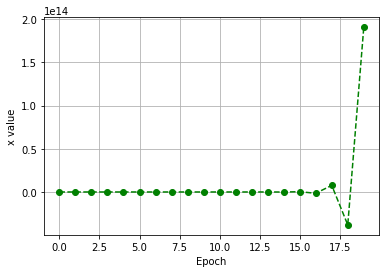

In [27]:
import matplotlib.pyplot as plt

plt.plot(result, "--o", color="green")
plt.xlabel('Epoch')
plt.ylabel("x value")
plt.grid()
plt.show()